# IBM Data Science Capstone Project

## Final Assignment: Stock Price and Revenue Analysis for Tesla and GameStop

### Run this cell first to install needed libraries

In [16]:
!pip install yfinance requests beautifulsoup4 lxml matplotlib


# Extracting Tesla Stock Data Using yfinance

In [17]:
import yfinance as yf
import pandas as pd

# Create Ticker Object for Tesla
tesla = yf.Ticker("TSLA")

# Extract historical stock data
try:
    tesla_data = tesla.history(period="5y")
    tesla_data.reset_index(inplace=True)
    print("Tesla stock data retrieved successfully.")
except Exception as e:
    print("Error retrieving Tesla stock data:", e)

# Display first 5 rows
tesla_data.head()


Tesla stock data retrieved successfully.


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-05-13 00:00:00-04:00,54.722000,55.066666,50.886665,52.730667,285982500,0.0,0.0
1,2020-05-14 00:00:00-04:00,52.000000,53.557335,50.933334,53.555332,205233000,0.0,0.0
2,2020-05-15 00:00:00-04:00,52.689999,53.669998,52.436668,53.278000,157776000,0.0,0.0
3,2020-05-18 00:00:00-04:00,55.185333,55.647999,53.591999,54.242001,174987000,0.0,0.0
4,2020-05-19 00:00:00-04:00,54.344666,54.804668,53.738667,53.867332,144547500,0.0,0.0


# Extracting Tesla Revenue Data Using Web Scraping

In [25]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

def get_tesla_revenue():
    url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36"
    }

    response = requests.get(url, headers=headers)

    if response.status_code != 200:
        print("Failed to fetch the page. Status code:", response.status_code)
        return None

    soup = BeautifulSoup(response.text, "html.parser")
    tables = soup.find_all("table")

    for table in tables:
        if "Revenue" in table.text and "Tesla" in table.text:
            try:
                df = pd.read_html(str(table))[0]
                df.columns = ["Date", "Revenue"]
                df["Revenue"] = df["Revenue"].str.replace(r"\$|,", "", regex=True)
                df = df.dropna()
                df["Revenue"] = pd.to_numeric(df["Revenue"], errors="coerce")
                return df
            except Exception as e:
                print("Error parsing table:", e)
                return None

    print("No matching revenue table found.")
    return None

# Run the function
tesla_revenue = get_tesla_revenue()

# Safely display results
if tesla_revenue is not None:
    display(tesla_revenue.head())
else:
    print("No Tesla revenue data found.")


C:\Users\Jayda\AppData\Local\Temp\ipykernel_9836\2227414592.py:24: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


,Date,Revenue
0,2024,97690
1,2023,96773
2,2022,81462
3,2021,53823
4,2020,31536


# Extracting GameStop Stock Data Using yfinance

In [26]:
# Create Ticker Object for GameStop
gamestop = yf.Ticker("GME")

# Extract historical stock data
try:
    gamestop_data = gamestop.history(period="5y")
    gamestop_data.reset_index(inplace=True)
    print("GameStop stock data retrieved successfully.")
except Exception as e:
    print("Error retrieving GameStop stock data:", e)

# Display first 5 rows
gamestop_data.head()


GameStop stock data retrieved successfully.


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-05-13 00:00:00-04:00,1.1350,1.1350,1.0175,1.0525,11531600,0.0,0.0
1,2020-05-14 00:00:00-04:00,1.0375,1.0475,0.9900,1.0325,8019600,0.0,0.0
2,2020-05-15 00:00:00-04:00,1.0125,1.1125,1.0100,1.0550,7762400,0.0,0.0
3,2020-05-18 00:00:00-04:00,1.1000,1.1575,1.0900,1.1450,9456800,0.0,0.0
4,2020-05-19 00:00:00-04:00,1.1450,1.1875,1.0925,1.1100,7362800,0.0,0.0


# Extracting GameStop Revenue Data Using Web Scraping

In [28]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

def get_gamestop_revenue():
    url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36"
    }

    response = requests.get(url, headers=headers)

    if response.status_code != 200:
        print("Failed to fetch the page. Status code:", response.status_code)
        return None

    soup = BeautifulSoup(response.text, "html.parser")
    tables = soup.find_all("table")

    for table in tables:
        if "Revenue" in table.text and "GameStop" in table.text:
            try:
                df = pd.read_html(str(table))[0]
                df.columns = ["Date", "Revenue"]
                df["Revenue"] = df["Revenue"].str.replace(r"\$|,", "", regex=True)
                df = df.dropna()
                df["Revenue"] = pd.to_numeric(df["Revenue"], errors="coerce")
                return df
            except Exception as e:
                print("Error parsing GameStop table:", e)
                return None

    print("No matching revenue table found.")
    return None

# Run the function
gamestop_revenue = get_gamestop_revenue()

# Display data only if available
if gamestop_revenue is not None:
    display(gamestop_revenue.head())
else:
    print("No GameStop revenue data found.")


C:\Users\Jayda\AppData\Local\Temp\ipykernel_9836\1173391497.py:24: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


,Date,Revenue
0,2025,3823
1,2024,5273
2,2023,5927
3,2022,6011
4,2021,5090


# Tesla Stock and Revenue Dashboard

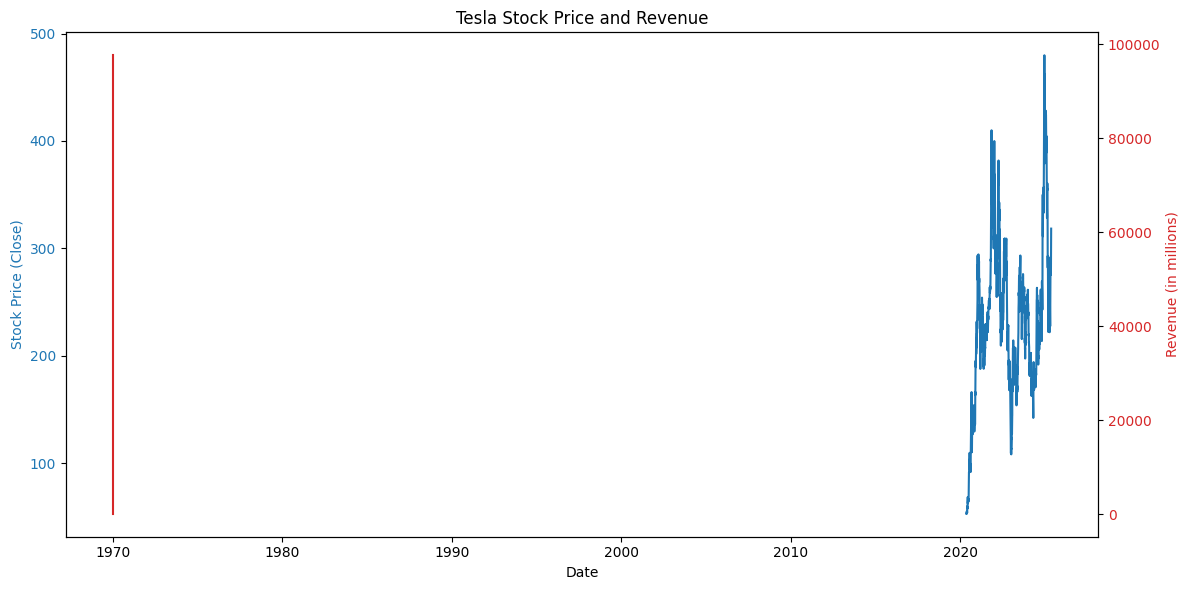

In [29]:
import matplotlib.pyplot as plt

# Plot Tesla stock and revenue
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price (Close)', color=color)
ax1.plot(tesla_data['Date'], tesla_data['Close'], color=color, label='Stock Price')
ax1.tick_params(axis='y', labelcolor=color)
plt.title('Tesla Stock Price and Revenue')

# Create secondary y-axis
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Revenue (in millions)', color=color)
ax2.plot(pd.to_datetime(tesla_revenue['Date']), tesla_revenue['Revenue'], color=color, label='Revenue')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()


# GameStop Stock and Revenue Dashboard

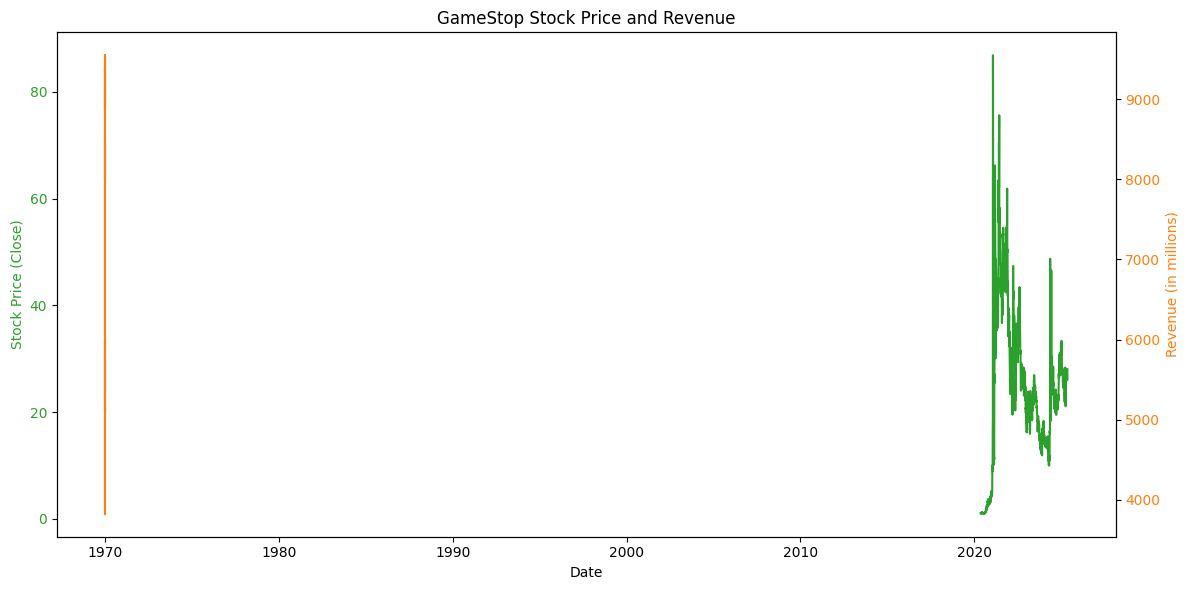

In [30]:
# Plot GameStop stock and revenue
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:green'
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price (Close)', color=color)
ax1.plot(gamestop_data['Date'], gamestop_data['Close'], color=color, label='Stock Price')
ax1.tick_params(axis='y', labelcolor=color)
plt.title('GameStop Stock Price and Revenue')

# Create secondary y-axis
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Revenue (in millions)', color=color)
ax2.plot(pd.to_datetime(gamestop_revenue['Date']), gamestop_revenue['Revenue'], color=color, label='Revenue')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()
